In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200202a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200202a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200202a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db
#fdw_time
#print(fh.variables.keys())
# navi =  nav.iloc[:,1:5]
# navi.columns = ['time','roll','pitch','yaw']
# navi.drop(navi.index[0:242036],inplace=True)
# navi.shape
#array = np.arange(41282,72804, 1)

FileNotFoundError: [Errno 2] No such file or directory: b'EUREC4A_HALO_BAHAMAS-Radiometer_20200202a.nc'

In [2]:
array = np.arange(40073,72805, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.drop(data_int.index[0:12089],inplace=True)
data_int.reset_index(inplace=True)
data_int

,index,F_dw,f_dir
0,41282,189.173493,0.656927
1,41282,189.206762,0.657033
2,41282,189.240030,0.657140
3,41282,189.273299,0.657246
4,41282,189.306567,0.657353
...,...,...,...
315225,72804,365.346924,0.769713
315226,72804,365.346924,0.769713
315227,72804,365.346924,0.769713
315228,72804,365.346924,0.769713


In [3]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,41282,162.121002,15.665559,384.632996,459.277863,110.903412,13.386665,189.173493,0.656927
1,41282,162.650299,15.835946,384.881653,459.127808,110.903572,13.387107,189.206762,0.657033
2,41282,161.770004,16.401773,392.160339,458.548157,110.903725,13.387549,189.240030,0.657140
3,41282,160.883224,16.472271,391.475006,458.712372,110.903885,13.387991,189.273299,0.657246
4,41282,160.521164,15.831987,386.693115,458.579712,110.904037,13.388433,189.306567,0.657353
...,...,...,...,...,...,...,...,...,...
315225,72804,405.684998,50.879879,399.038605,531.965881,-114.947884,23.909742,365.346924,0.769713
315226,72804,405.013489,49.476360,404.354034,532.563171,-114.947693,23.909323,365.346924,0.769713
315227,72804,405.205841,47.748604,406.123077,533.157898,-114.947510,23.908903,365.346924,0.769713
315228,72804,404.651947,46.727310,389.688080,534.058472,-114.947319,23.908482,365.346924,0.769713


In [4]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])

# r_off = 0.3
# p_off = -2.55
# r = ri+r_off
# p = pi+p_off

df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,41282,162.121002,15.665559,384.632996,459.277863,110.903412,13.386665,189.173493,0.656927,1.071365,5.115808,75.315399
1,41282,162.650299,15.835946,384.881653,459.127808,110.903572,13.387107,189.206762,0.657033,1.068658,5.240881,75.315399
2,41282,161.770004,16.401773,392.160339,458.548157,110.903725,13.387549,189.240030,0.657140,1.046169,5.390032,75.319954
3,41282,160.883224,16.472271,391.475006,458.712372,110.903885,13.387991,189.273299,0.657246,1.038644,5.546709,75.316902
4,41282,160.521164,15.831987,386.693115,458.579712,110.904037,13.388433,189.306567,0.657353,1.052014,5.714290,75.325287
...,...,...,...,...,...,...,...,...,...,...,...,...
315225,72804,405.684998,50.879879,399.038605,531.965881,-114.947884,23.909742,365.346924,0.769713,-0.043594,1.952794,76.493645
315226,72804,405.013489,49.476360,404.354034,532.563171,-114.947693,23.909323,365.346924,0.769713,-0.048684,1.795963,76.488434
315227,72804,405.205841,47.748604,406.123077,533.157898,-114.947510,23.908903,365.346924,0.769713,-0.060161,1.639467,76.466820
315228,72804,404.651947,46.727310,389.688080,534.058472,-114.947319,23.908482,365.346924,0.769713,-0.095360,1.514155,76.468719


In [5]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
#df_big.to_csv('df_big_02feb.csv')

In [6]:
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
df_bigg.to_csv('df_bigg_2feb.csv')

In [8]:
df_biggg = pd.read_csv('df_bigg_2feb.csv',)
df_biggg

,Unnamed: 0,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected
0,0,41282,160.40054,16.534860,385.72757,459.02206,110.904110,13.388654,189.323202,0.657406,1.050522,5.814032,75.329850,187.742140
1,1,41283,154.63924,18.768763,386.86194,458.41086,110.905685,13.393076,189.655887,0.658471,0.904060,6.999702,75.385820,187.794137
2,2,41284,148.87973,21.348999,381.63120,457.43582,110.907250,13.397508,189.988572,0.659537,-0.097471,7.503046,75.336975,188.277763
3,3,41285,142.92621,25.491081,381.89746,457.09692,110.908820,13.401946,190.321257,0.660602,-1.413588,7.417113,75.128136,189.039878
4,4,41286,139.03795,28.545044,382.12073,457.85663,110.910400,13.406387,190.653942,0.661667,-1.314171,7.895410,74.909615,189.240829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31518,31518,72800,387.93042,41.108150,407.54468,521.64716,-114.955470,23.926800,365.346924,0.769713,-0.358857,1.448930,77.000690,363.591243
31519,31519,72801,393.96332,38.974957,397.68375,525.27670,-114.953590,23.922580,365.346924,0.769713,1.311409,1.672134,77.042180,363.384461
31520,31520,72802,398.51710,43.905525,399.63583,527.75555,-114.951720,23.918367,365.346924,0.769713,-0.424821,2.323312,77.111660,365.393806
31521,31521,72803,402.86816,54.360600,402.72604,529.43506,-114.949844,23.914158,365.346924,0.769713,-0.427092,2.644296,76.771550,366.082412


In [9]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(72804)

[20, 13, 24]

In [10]:
import datetime
start = datetime.datetime(2020, 2, 2, 11, 28, 2)
end = datetime.datetime(2020, 2, 2, 20, 13, 24)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_biggg['time']=df_time_delta
df_biggg

,Unnamed: 0,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,0,41282,160.40054,16.534860,385.72757,459.02206,110.904110,13.388654,189.323202,0.657406,1.050522,5.814032,75.329850,187.742140,2020-02-02 11:28:02
1,1,41283,154.63924,18.768763,386.86194,458.41086,110.905685,13.393076,189.655887,0.658471,0.904060,6.999702,75.385820,187.794137,2020-02-02 11:28:03
2,2,41284,148.87973,21.348999,381.63120,457.43582,110.907250,13.397508,189.988572,0.659537,-0.097471,7.503046,75.336975,188.277763,2020-02-02 11:28:04
3,3,41285,142.92621,25.491081,381.89746,457.09692,110.908820,13.401946,190.321257,0.660602,-1.413588,7.417113,75.128136,189.039878,2020-02-02 11:28:05
4,4,41286,139.03795,28.545044,382.12073,457.85663,110.910400,13.406387,190.653942,0.661667,-1.314171,7.895410,74.909615,189.240829,2020-02-02 11:28:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31518,31518,72800,387.93042,41.108150,407.54468,521.64716,-114.955470,23.926800,365.346924,0.769713,-0.358857,1.448930,77.000690,363.591243,2020-02-02 20:13:20
31519,31519,72801,393.96332,38.974957,397.68375,525.27670,-114.953590,23.922580,365.346924,0.769713,1.311409,1.672134,77.042180,363.384461,2020-02-02 20:13:21
31520,31520,72802,398.51710,43.905525,399.63583,527.75555,-114.951720,23.918367,365.346924,0.769713,-0.424821,2.323312,77.111660,365.393806,2020-02-02 20:13:22
31521,31521,72803,402.86816,54.360600,402.72604,529.43506,-114.949844,23.914158,365.346924,0.769713,-0.427092,2.644296,76.771550,366.082412,2020-02-02 20:13:23


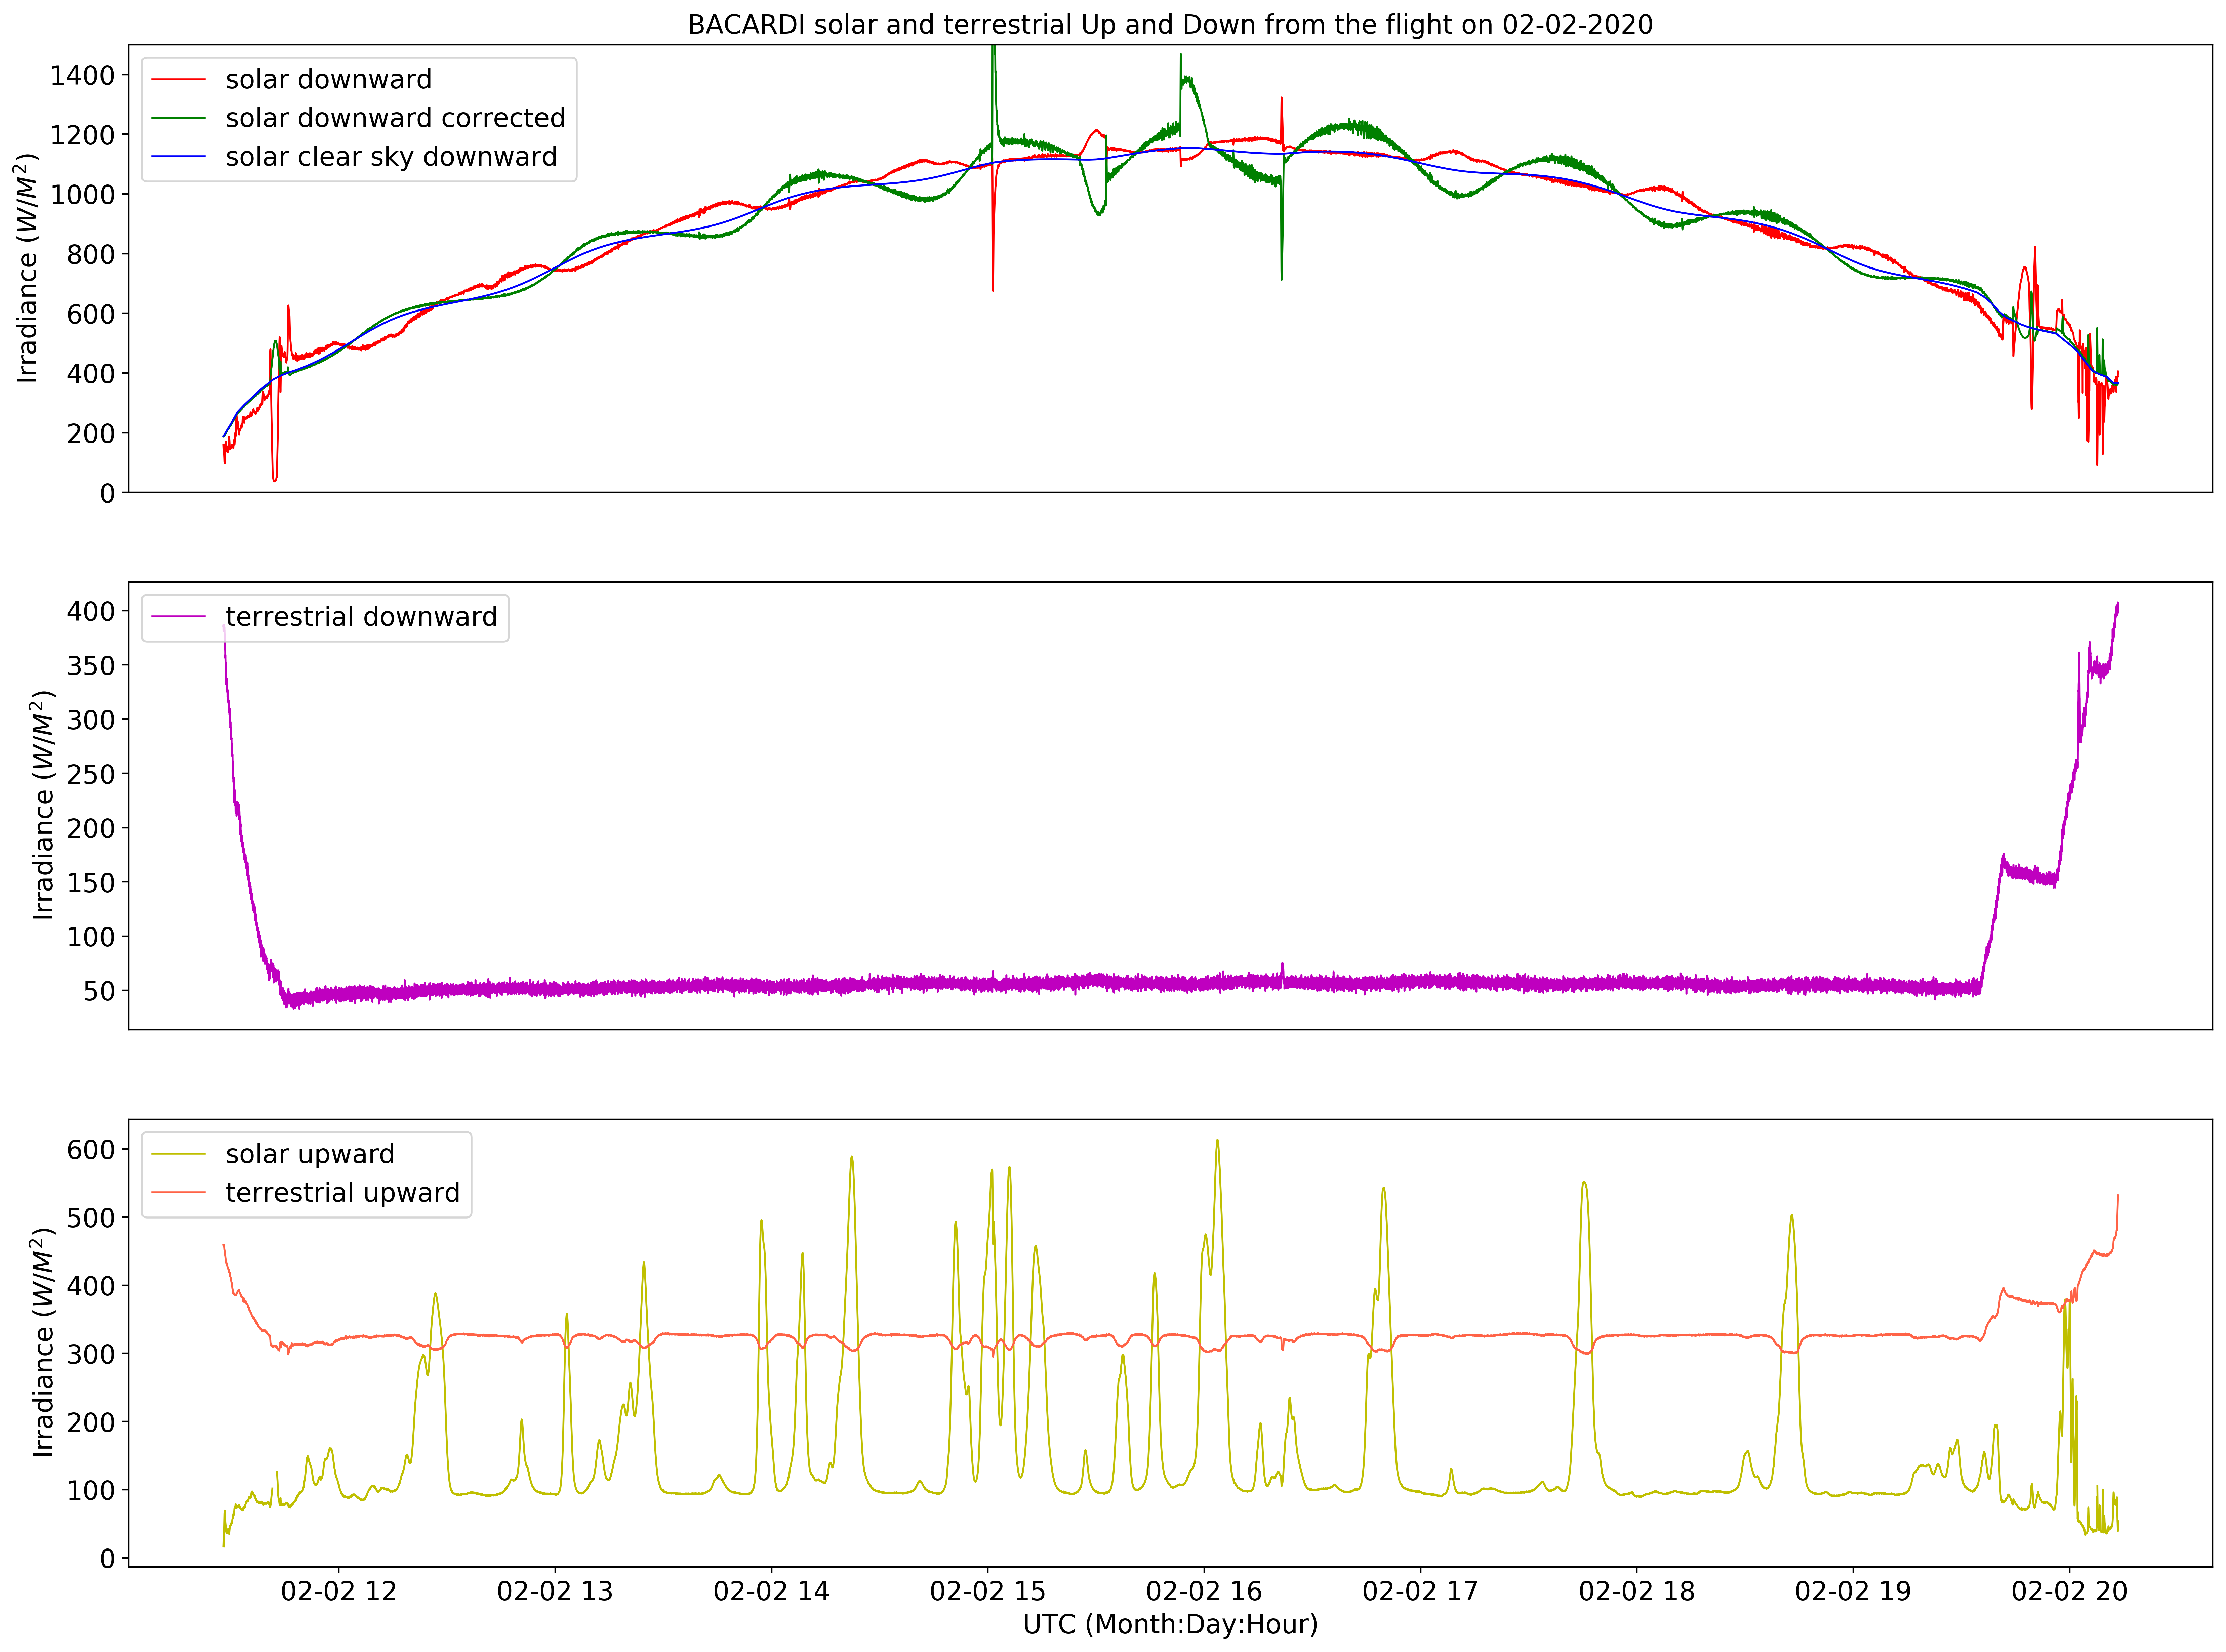

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_biggg.time,df_biggg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_biggg.time,df_biggg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 02-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.ylim(0,1500)
plt.subplot(312)
plt.plot(df_biggg.time,df_biggg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_biggg.time,df_biggg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()

In [21]:
x = df_bigg.loc[:,'shortwave_down_corrected'] > 2000
x[x].index

Int64Index([12797, 12798, 12799, 12800, 12801, 12802, 12803, 12804, 12805,
            12806, 12807, 12808, 12809, 12810, 12811, 12812, 12813],
           dtype='int64')

In [4]:
import math
def Fdw_attitude_correction(fdw,r,p,y,sza,saa,r_off,p_off,fdir):
    for i in szai:
        for j in saai:
            for k in r:
                for l in p:
                    for m in yi:
                        for n in fdw:
                            for o in fdir:
                                eq1 = math.sin((90-i)*(math.pi/180))
                                eq2 = math.cos((90-i)*(math.pi/180))*math.sin(k*(math.pi/180))*math.sin((j-m)*(math.pi/180))
                                eq3 = math.cos((90-i)*(math.pi/180))*math.sin(l*(math.pi/180))
                                eq4 = math.cos(k*(math.pi/180))*math.cos((j-m)*(math.pi/180))
                                eq5 = math.sin((90-i)*(math.pi/180))*math.cos(l*(math.pi/180))*math.cos(k*(math.pi/180))
                                #factor = eq1/((eq2-eq3*(eq4+eq5))
                                factor = eq1/(eq2-((eq3+eq4)+eq5))
                                Fdw=o*n*factor+(1-o)*n
                                return Fdw


In [ ]:
(math.pi/180)

In [5]:
correction_weighted = Fdw_attitude_correction(fdw,r,p,yi,szai,saai,r_off,p_off,fdir)
corrected_FDSC = SWD.swu - correction_weighted
swd_correct = pd.DataFrame(corrected_FDSC)
swd_correct.columns = ['swd_corr']
swd_correct

,swd_corr
0,164.696347
1,165.225644
2,164.345349
3,163.458569
4,163.096509
...,...
315225,408.260342
315226,407.588833
315227,407.781186
315228,407.227292


In [19]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(72804)


[20, 13, 24]

In [6]:
fg = pd.concat([time_bac.time,swd_correct.swd_corr,SWD.swu],axis=1)
import datetime 
def convert(n): 
    return str(datetime.timedelta(seconds = n)) 
time = []
for x in fg.time:
    t = convert(x)
    time.append(t)
date_time = pd.DataFrame(time)
fg['Time'] = date_time.iloc[:,:]
fg.shape

(315230, 4)

In [7]:
import datetime
start = datetime.datetime(2020, 2, 2, 11, 28, 2)
end = datetime.datetime(2020, 2, 2, 20, 13, 24)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_time_delta

,0
0,2020-02-02 11:28:02
1,2020-02-02 11:28:03
2,2020-02-02 11:28:04
3,2020-02-02 11:28:05
4,2020-02-02 11:28:06
...,...
31518,2020-02-02 20:13:20
31519,2020-02-02 20:13:21
31520,2020-02-02 20:13:22
31521,2020-02-02 20:13:23


C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


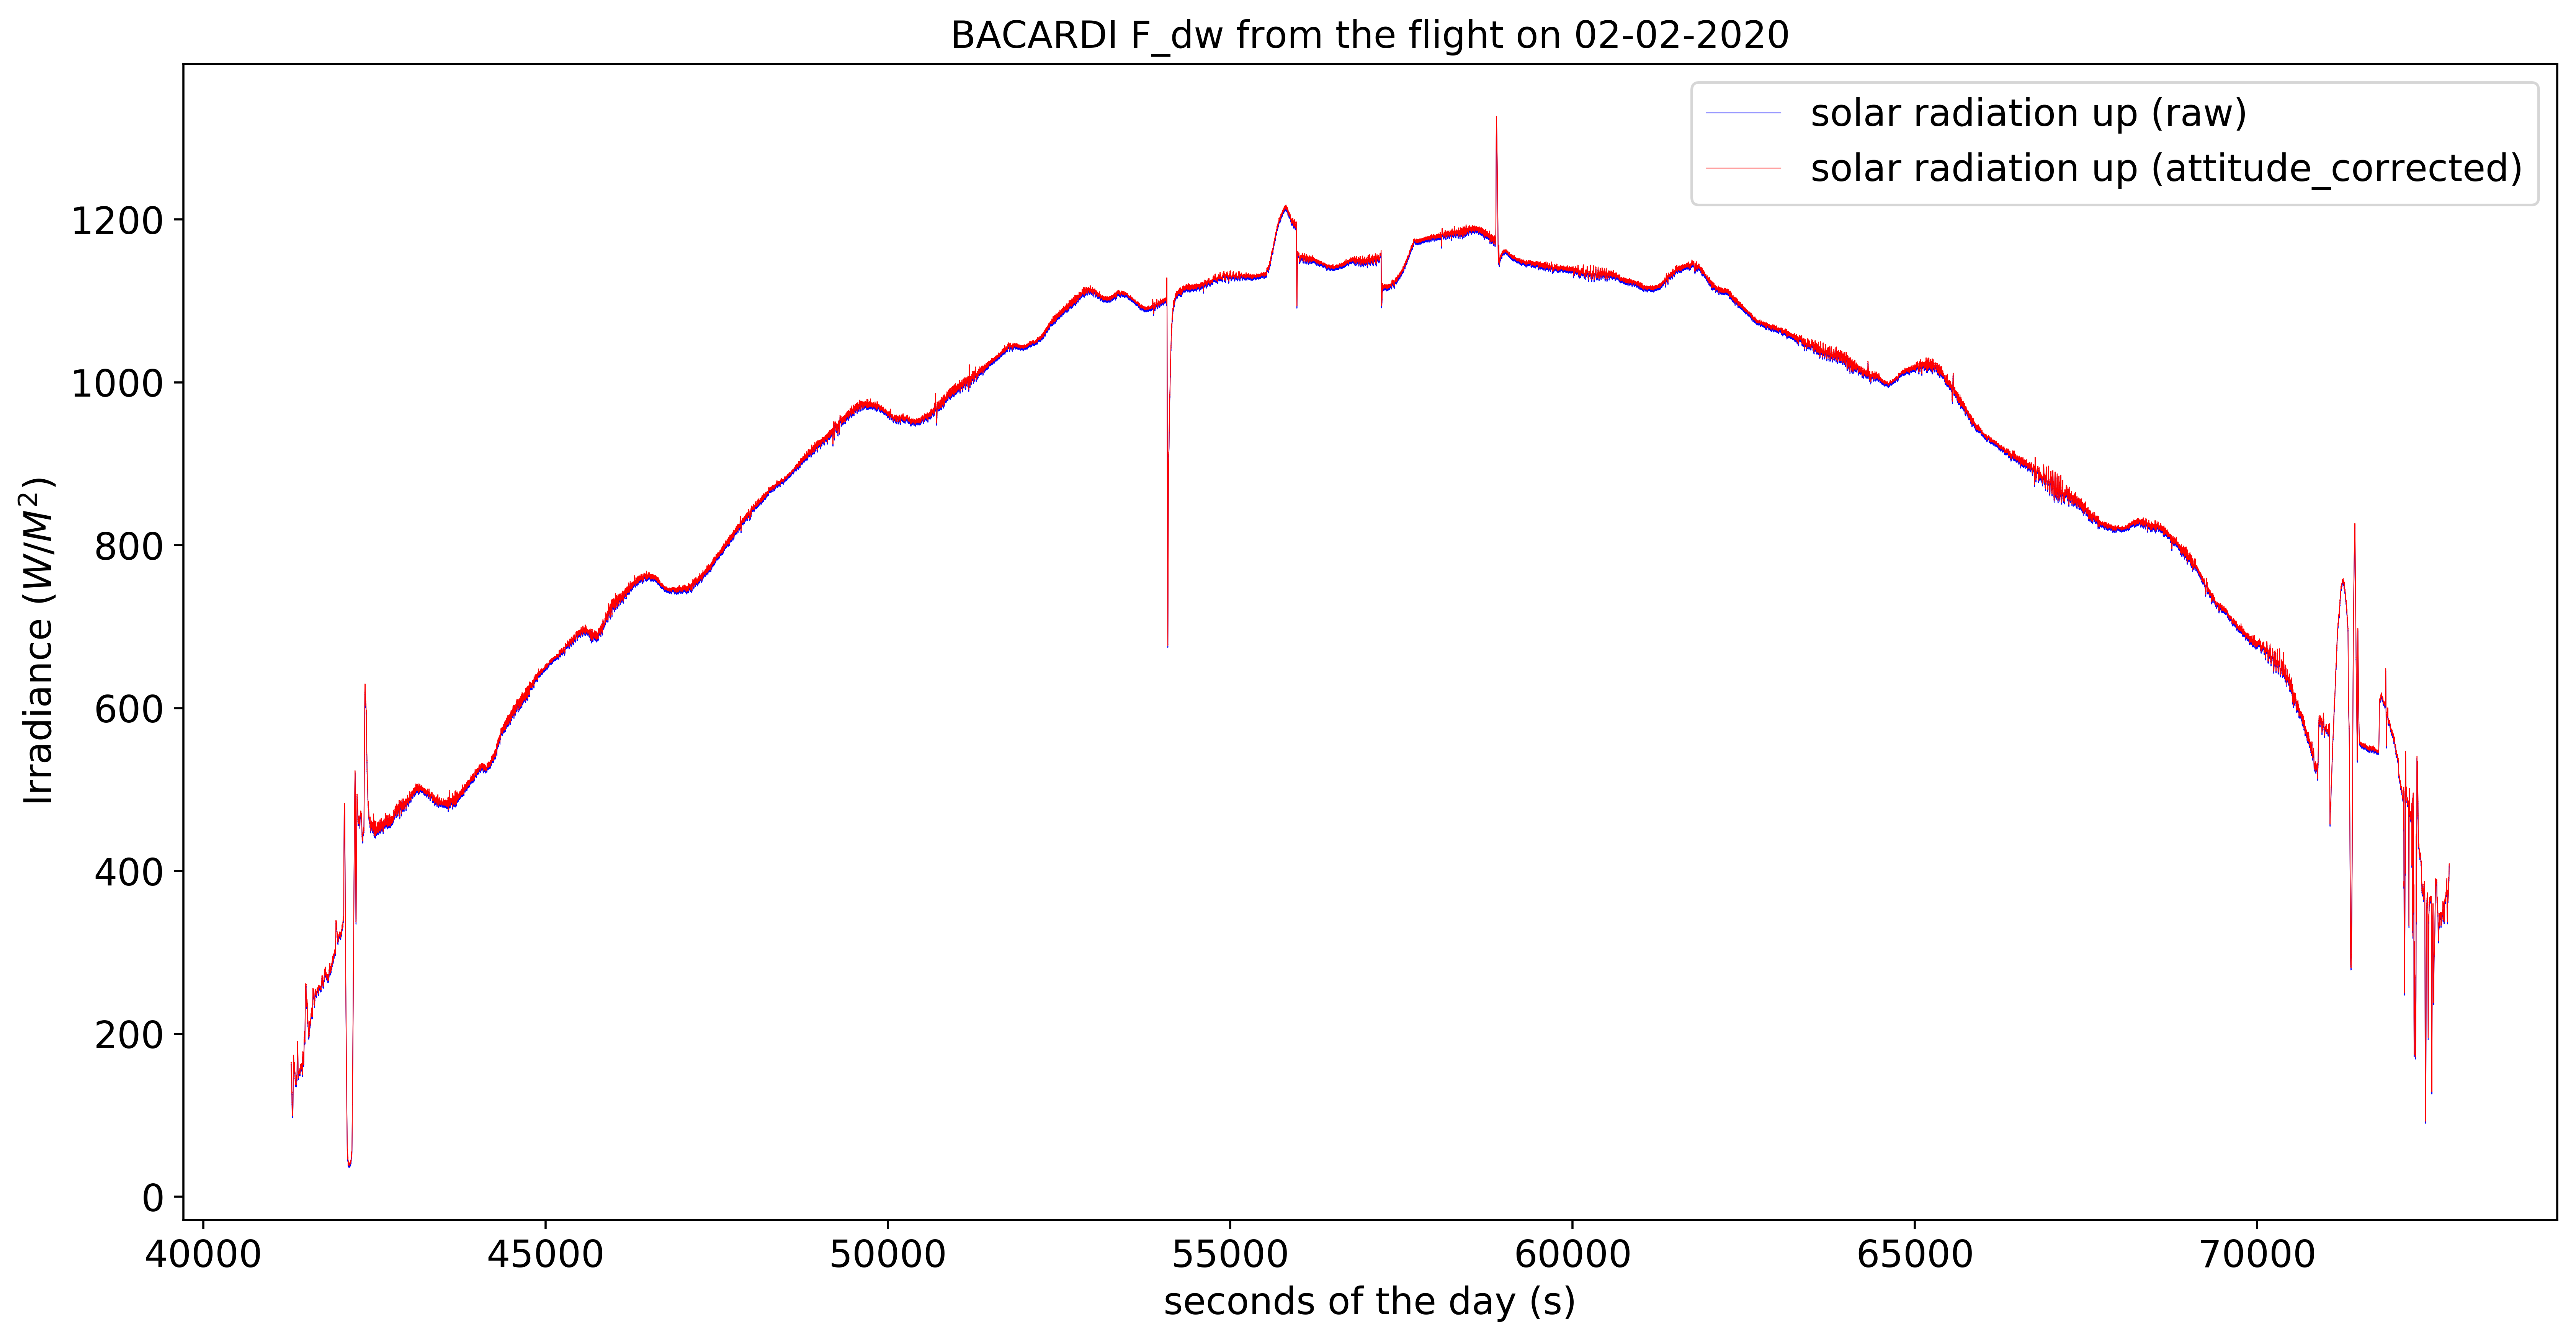

In [8]:
# def smooth(y, box_pts):
#     box = np.ones(box_pts)/box_pts
#     y_smooth = np.convolve(y, box, mode='same')
#     return y_smooth
#fg = pd.concat([time_bac.time,swd_correct.swd_corr,SWD.swu],axis=1)
#fg['deducted']=fg['swd_corr']-2
# fg
#df = pd.read_csv('fg_data.txt')
plt.figure(figsize=(16,8),dpi=500)
plt.title('BACARDI F_dw from the flight on 02-02-2020', fontsize =14)
plt.plot(fg.time,fg.swu, 'b-', label = 'solar radiation up (raw)',linewidth=0.3)
plt.plot(fg.time,fg.swd_corr, 'r-', label = 'solar radiation up (attitude_corrected)',linewidth=0.3)
# plt.plot(fg.Time, smooth(fg.swd_corr,500), 'b-')
# plt.plot(df_time_delta.time,bacardi.ShortWave_DOWN, 'm', label = 'solar radiation down')
# plt.plot(df_time_delta.time,bacardi.LongWave_UP, 'y', label = 'terrestrial radiation up')
# plt.plot(df_time_delta.time,bacardi.LongWave_DOWN, 'c', label = 'terrestrial radiation down')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('seconds of the day (s)',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.show()



In [ ]:
saa.shape

In [ ]:
navi.roll.shape

In [ ]:
fdw_time.shape

In [ ]:
time_bac.shape

In [ ]:
751431/315230